In [1]:
import cv2
import numpy as np
from skimage import img_as_float
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2 as cv

/home/tschernn/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
## applies CLAHE (local contrast enhancement), Retinex (lighting normalization), or both to a directory

def clahe_retinex_dir(dir):
    os.makedirs(f'images/preprocessed_imgs/clahe_retinex/{dir}', exist_ok=True)

    for file in os.listdir('images/' + dir):
        img_name = str(file)
        img_path = f'images/{dir}/{img_name}'
        
        # Load your image in grayscale
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # step 1: create CLAHE object and apply to image
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        processed_image = clahe.apply(image)

        # step 2: apply Retinex

        # Convert to float
        float_img = img_as_float(processed_image)
        
        # Gaussian blur to estimate illumination
        sigma = 30
        blurred = cv2.GaussianBlur(float_img, (0, 0), sigmaX=sigma, sigmaY=sigma)
        
        # Avoid division by zero
        retinex = np.clip(float_img / (blurred + 1e-6), 0, 10)
        
        # Rescale to [0,255] for output
        processed_image = rescale_intensity(retinex, out_range=(0, 255)).astype(np.uint8)

        out_path = f'images/preprocessed_imgs/clahe_retinex/{dir}/{img_name}'
        cv.imwrite(out_path, processed_image)
        print(f'Successfully wrote {out_path}')

In [7]:
# select directory of images to binarize

source_dir = 'writable_area_goettweig' 

clahe_retinex_dir(source_dir)

Successfully wrote images/preprocessed_imgs/clahe_retinex/writable_area_goettweig/9a46a8a7fff18858c10c19cccd27c3f6.jpg
Successfully wrote images/preprocessed_imgs/clahe_retinex/writable_area_goettweig/a98966f6b468309f575b4ee0d4ee3347.jpg
Successfully wrote images/preprocessed_imgs/clahe_retinex/writable_area_goettweig/43f55a9807deb4045481bd892d7bf183.jpg
Successfully wrote images/preprocessed_imgs/clahe_retinex/writable_area_goettweig/ac6db7b8bb8db9d2faed9aa8867c8b6e.jpg
Successfully wrote images/preprocessed_imgs/clahe_retinex/writable_area_goettweig/2b3d6b207d7b5feab5eab4893a033f80.jpg
Successfully wrote images/preprocessed_imgs/clahe_retinex/writable_area_goettweig/077b6733bfd190e5eb147af31d809642.jpg
Successfully wrote images/preprocessed_imgs/clahe_retinex/writable_area_goettweig/a931fc89cf18f1a693b4eca75e3dae40.jpg
Successfully wrote images/preprocessed_imgs/clahe_retinex/writable_area_goettweig/5fc43a7d7165537182956a340fe2aa97.jpg
Successfully wrote images/preprocessed_imgs/clah

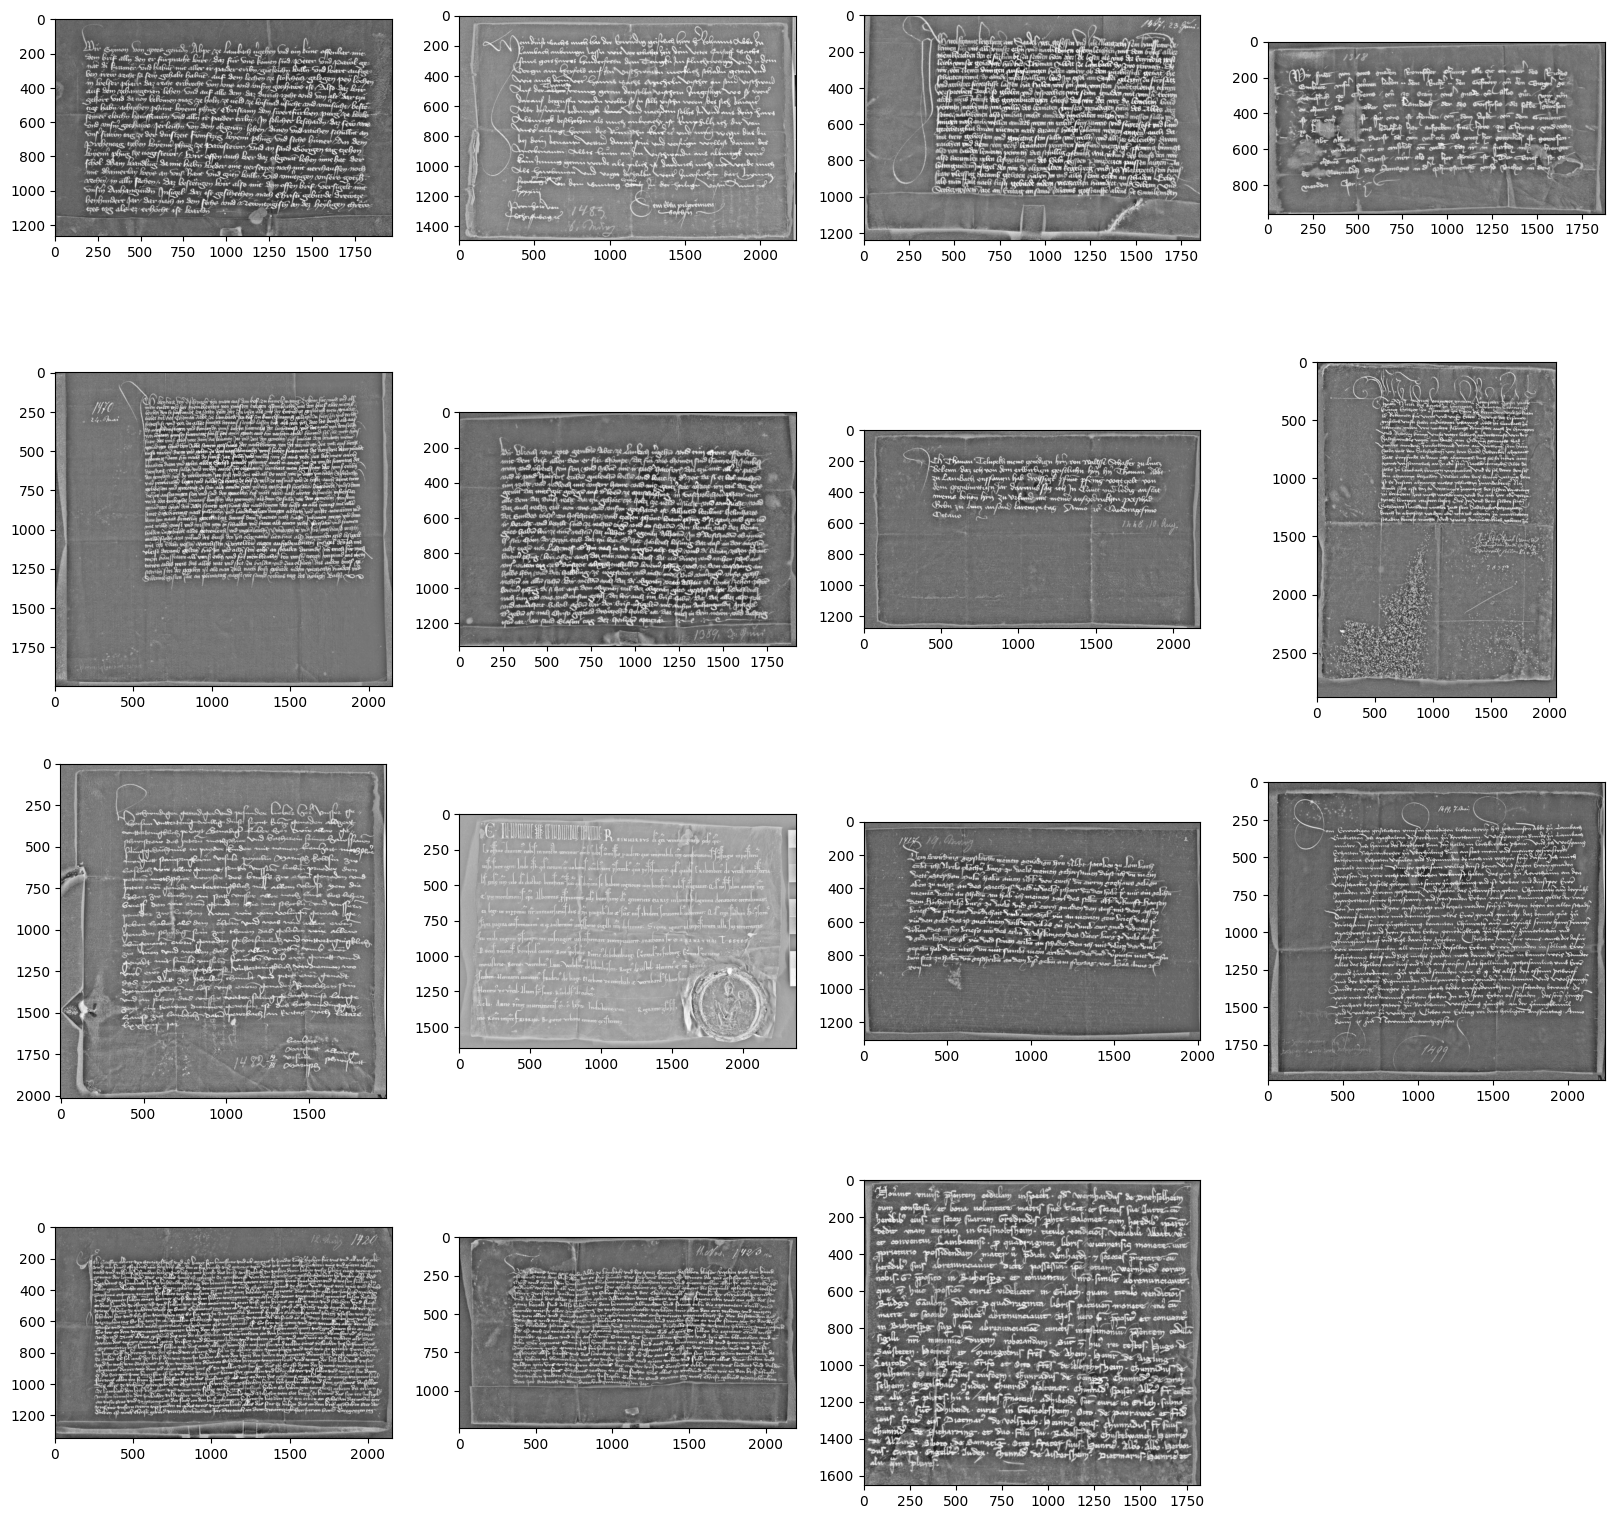

In [6]:
### visualize results
result_dir = os.listdir(f'images/preprocessed_imgs/clahe_retinex/{source_dir}')
plt.figure(figsize = (20, 20));
num = 16 # num of items to visualize
for i in range(1, num): 
    plt.subplot(4, 4, i); # number of rows, number of columns, item number
    img = mpimg.imread(f'images/preprocessed_imgs/clahe_retinex/{source_dir}/' + result_dir[i])
    plt.imshow(img, cmap = plt.cm.binary);
plt.show()